## Importing Libraries and Dataset

In [108]:
# Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings 
warnings.simplefilter('ignore')

In [109]:
# Loading data
df = pd.read_csv('SEP.csv')

## Exploratory Data Analysis

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [111]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [112]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [113]:
# Find null values
null_val=df.isna().sum()
null_val

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

Preliminary examination of the dataset has revealed that it contains no missing values, therefore familiarity with methods for handling missing records is not required. Nevertheless, it is feasible to see that not all aspects are represented by the most appropriate class. For example, the study's numerous dates are represented as "objects," while in fact they should be transformed to "datetime" objects for easier data processing

In [114]:
data = df

# Converting UNIX time to datetime object
data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

# Setting the right timezone to the datetime object
data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

In [115]:
# Extracting date from Data column
data['Data'] = pd.to_datetime(data['Data']).dt.date

#Converting Sunrise and Sunset columns into datetime.time objects
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

#Creating new sunset/sunrise columns featuring also the right date
data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

#Adding approriate timezone
data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

In [116]:
# Setting Date as index, sorting and dropping columns
data.set_index('Date', inplace = True)

data.sort_index()

data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

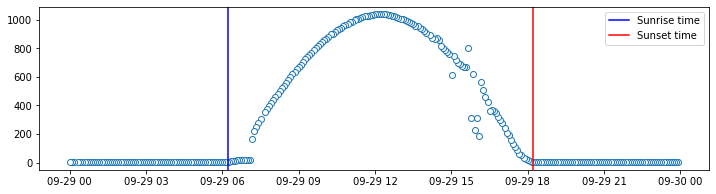

In [117]:
data_one_day = data.loc['2016-09-29':'2016-09-30',:]

plt.figure(figsize = (12,3))
plt.plot(data_one_day.Radiation, 'o', markerfacecolor = 'w')

# Plotting vertical line at sunrise
plt.axvline(data_one_day.sunrise_time.iloc[0], label = 'Sunrise time', color = 'blue')

# Plotting vertical line at sunset
plt.axvline(data_one_day.sunset_time.iloc[0], label = 'Sunset time', color = 'red') 

# Adjusting timezone of x-axis
plt.gca().xaxis_date('HST')

plt.legend()
plt.show()

It would be realistic to anticipate that, on any given day, the solar radiation would be close to zero before dawn and after sunset if the df handling had been done appropriately. This might be verified via a graphical investigation. According to the plot, the different dates have been accurately modified. It is now able to move on with the dfset's preliminary df analysis

In [118]:
# This step is to gain a feel of how the df looks and to check whether the df truly makes sense, for example, identifying negative numbers for solar radiation would be misleading.
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


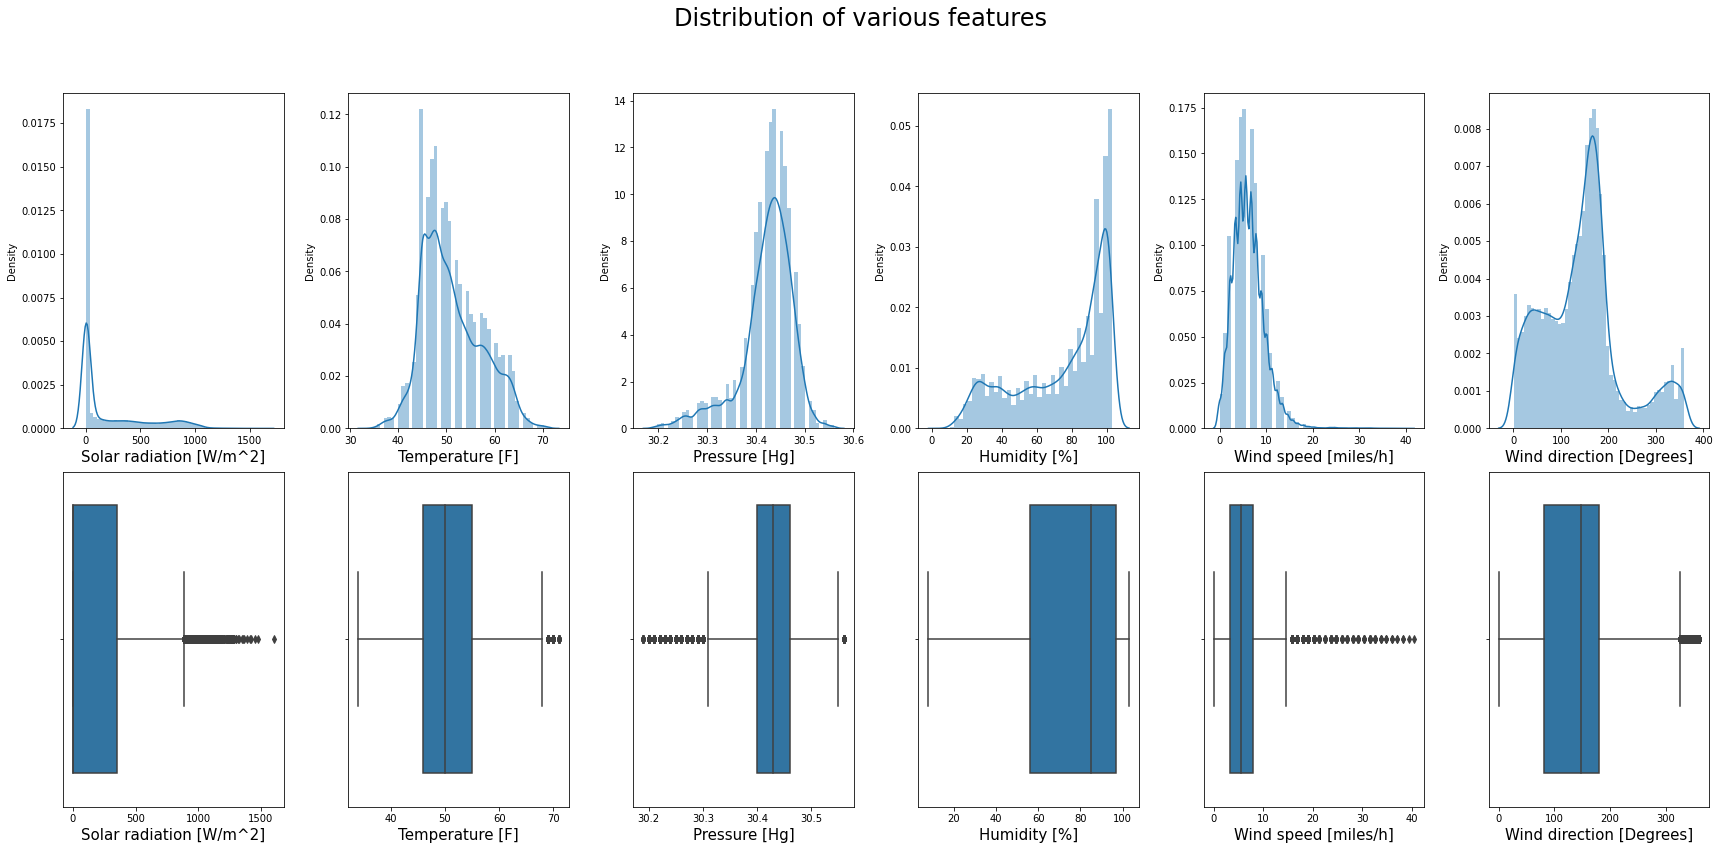

In [119]:
# Checking data distribution
fig, ax = plt.subplots(nrows =2, ncols = 6, figsize = (24, 12))

sns.distplot(data.Radiation, ax = ax[0,0])
ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 15)

sns.distplot(data.Temperature, ax = ax[0,1])
ax[0,1].set_xlabel('Temperature [F]', fontsize = 15)

sns.distplot(data.Pressure, ax = ax[0,2])
ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 15)

sns.distplot(data.Humidity, ax = ax[0,3])
ax[0,3].set_xlabel('Humidity [%]', fontsize = 15)

sns.distplot(data.Speed, ax = ax[0,4])
ax[0,4].set_xlabel('Wind speed [miles/h]', fontsize = 15)

sns.distplot(data['WindDirection(Degrees)'], ax = ax[0,5])
ax[0,5].set_xlabel('Wind direction [Degrees]', fontsize = 15)

sns.boxplot(data.Radiation, ax = ax[1,0])
ax[1,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 15)

sns.boxplot(data.Temperature, ax = ax[1,1])
ax[1,1].set_xlabel('Temperature [F]', fontsize = 15)

sns.boxplot(data.Pressure, ax = ax[1,2])
ax[1,2].set_xlabel('Pressure [Hg]', fontsize = 15)

sns.boxplot(data.Humidity, ax = ax[1,3])
ax[1,3].set_xlabel('Humidity [%]', fontsize = 15)

sns.boxplot(data.Speed, ax = ax[1,4])
ax[1,4].set_xlabel('Wind speed [miles/h]', fontsize = 15)

sns.boxplot(data['WindDirection(Degrees)'], ax = ax[1,5])
ax[1,5].set_xlabel('Wind direction [Degrees]', fontsize = 15)

fig.suptitle('Distribution of various features', fontsize = 24)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

In [120]:
# Creating median dataset
data_median = data.resample('H').median().dropna()

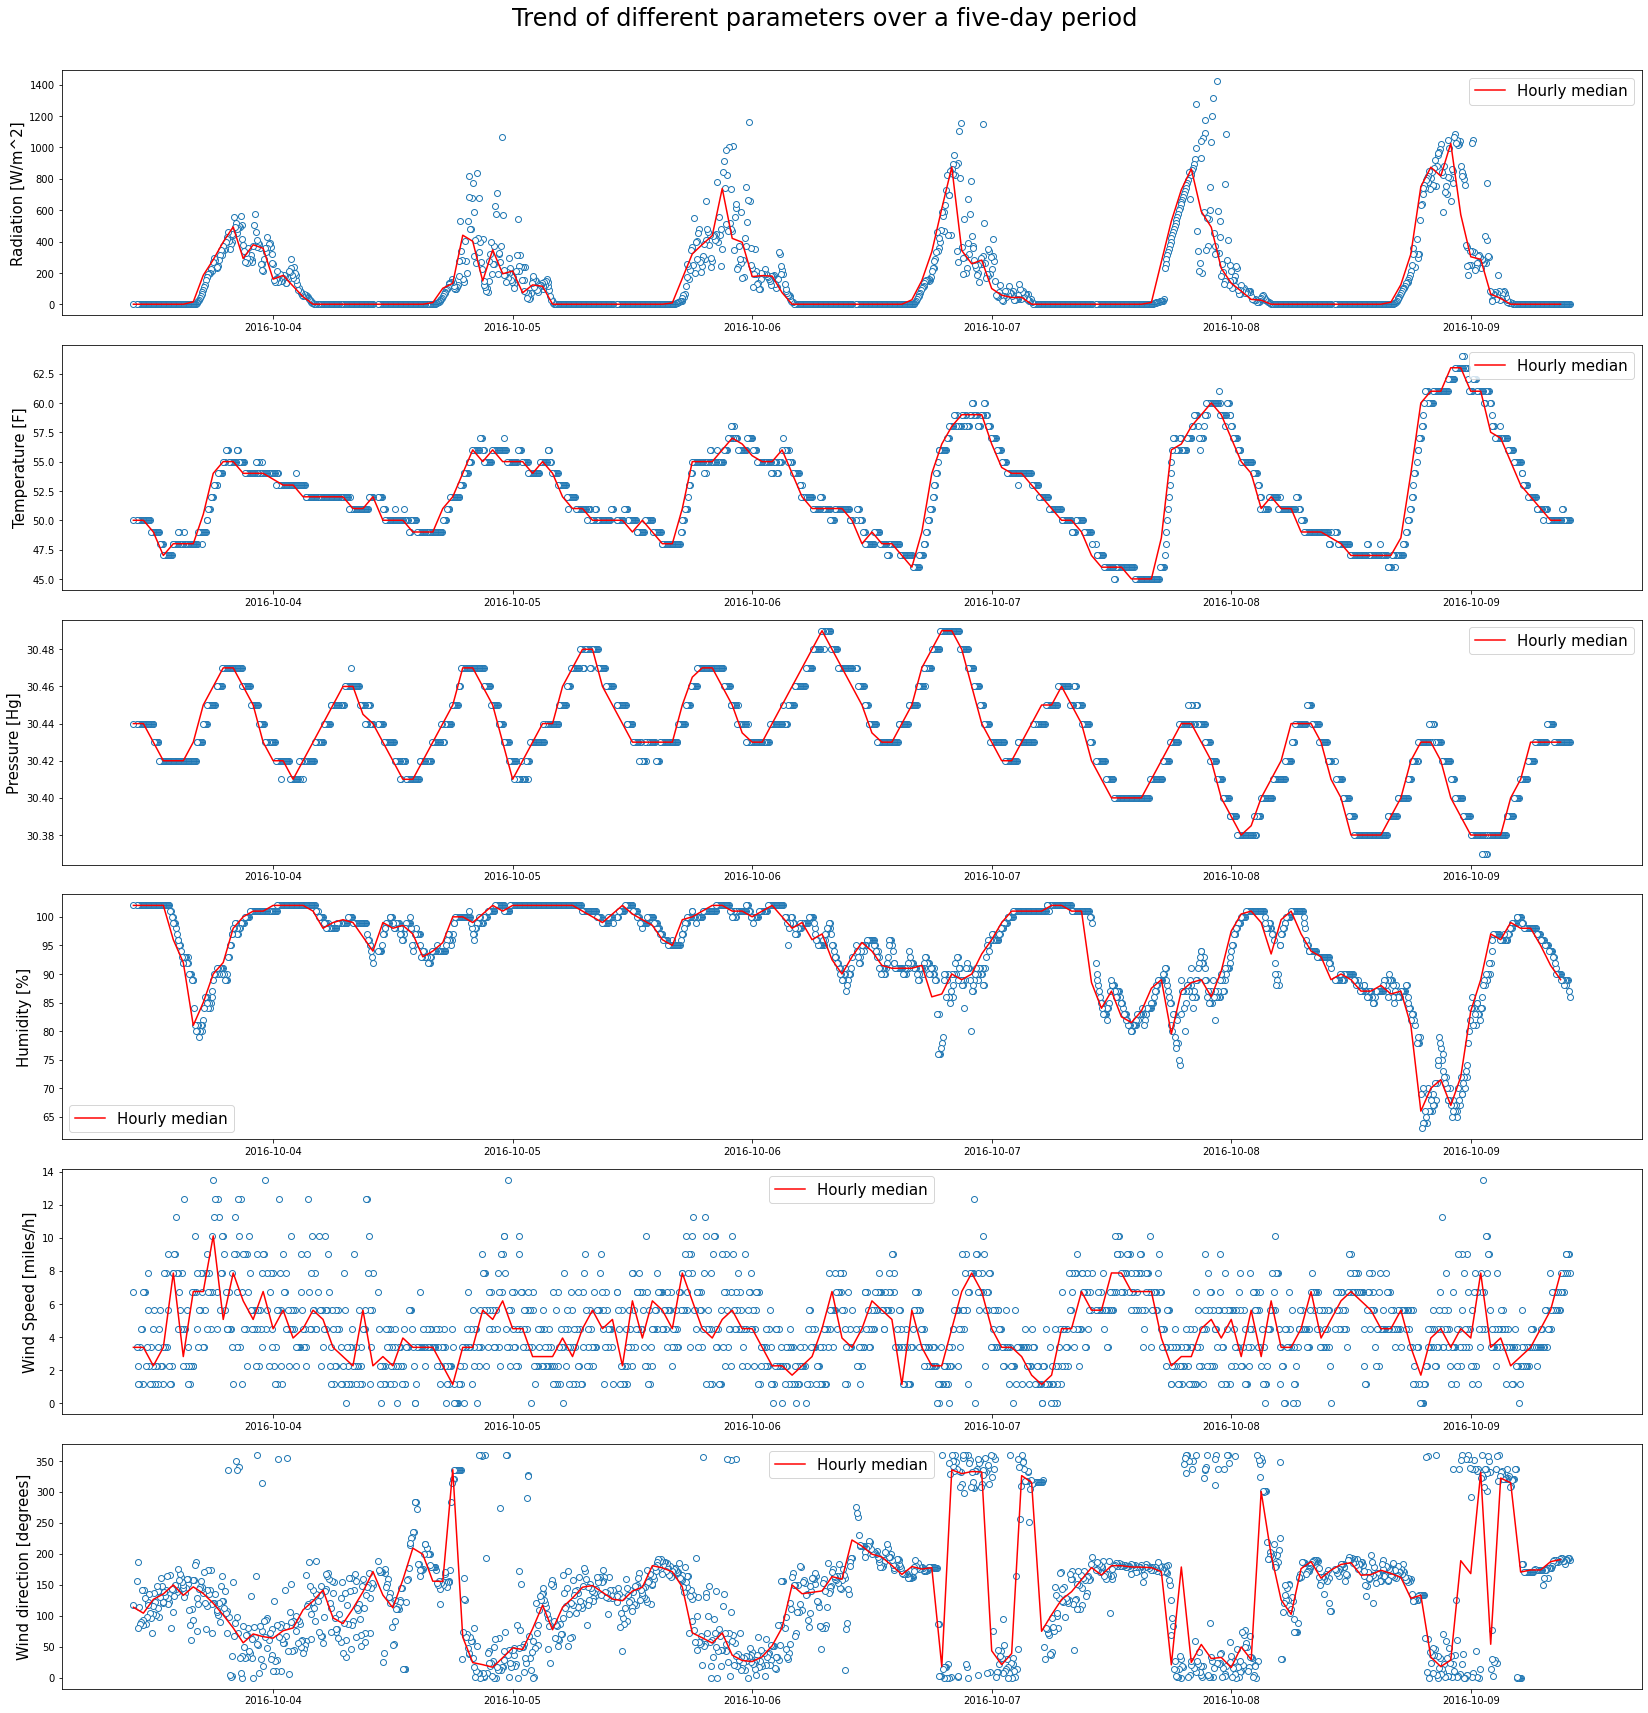

In [121]:
# Exploration of 5-day data
data_5 = data.loc['2016-10-03':'2016-10-08',:]
data_5_median = data_median.loc['2016-10-03':'2016-10-08',:]


fig, ax = plt.subplots(nrows =6, ncols = 1, figsize = (23,25))

ax[0].plot(data_5.Radiation,'o', markerfacecolor='w')
ax[0].plot(data_5_median.Radiation, linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[0].set_ylabel('Radiation [W/m^2]', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(data_5.Temperature,'o', markerfacecolor='w')
ax[1].plot(data_5_median.Temperature, linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[1].set_ylabel('Temperature [F]', fontsize = 15)
ax[1].legend(fontsize = 15)

ax[2].plot(data_5.Pressure,'o', markerfacecolor='w')
ax[2].plot(data_5_median.Pressure, linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[2].set_ylabel('Pressure [Hg]', fontsize = 15)
ax[2].legend(fontsize = 15)

ax[3].plot(data_5.Humidity,'o', markerfacecolor='w')
ax[3].plot(data_5_median.Humidity, linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[3].set_ylabel('Humidity [%]', fontsize = 15)
ax[3].legend(fontsize = 15)

ax[4].plot(data_5.Speed,'o', markerfacecolor='w')
ax[4].plot(data_5_median.Speed, linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[4].set_ylabel('Wind Speed [miles/h]', fontsize = 15)
ax[4].legend(fontsize = 15)

ax[5].plot(data_5['WindDirection(Degrees)'],'o', markerfacecolor='w')
ax[5].plot(data_5_median['WindDirection(Degrees)'], linewidth = 1.5, color = 'red', label = 'Hourly median')
ax[5].set_ylabel('Wind direction [degrees]', fontsize = 15)
ax[5].legend(fontsize = 15)

fig.suptitle('Trend of different parameters over a five-day period', fontsize = 24)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.show()

In [122]:
# Converting sunrise and sunset times into timestamp
data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

# Creating a column containing the number of daily light hours
data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

# Creating column describing current time relative to sunrise/sunset
data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])

In [123]:
# Removing non-necessary columns
data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                     'sunset_time', 'sunrise_time'], inplace = True)

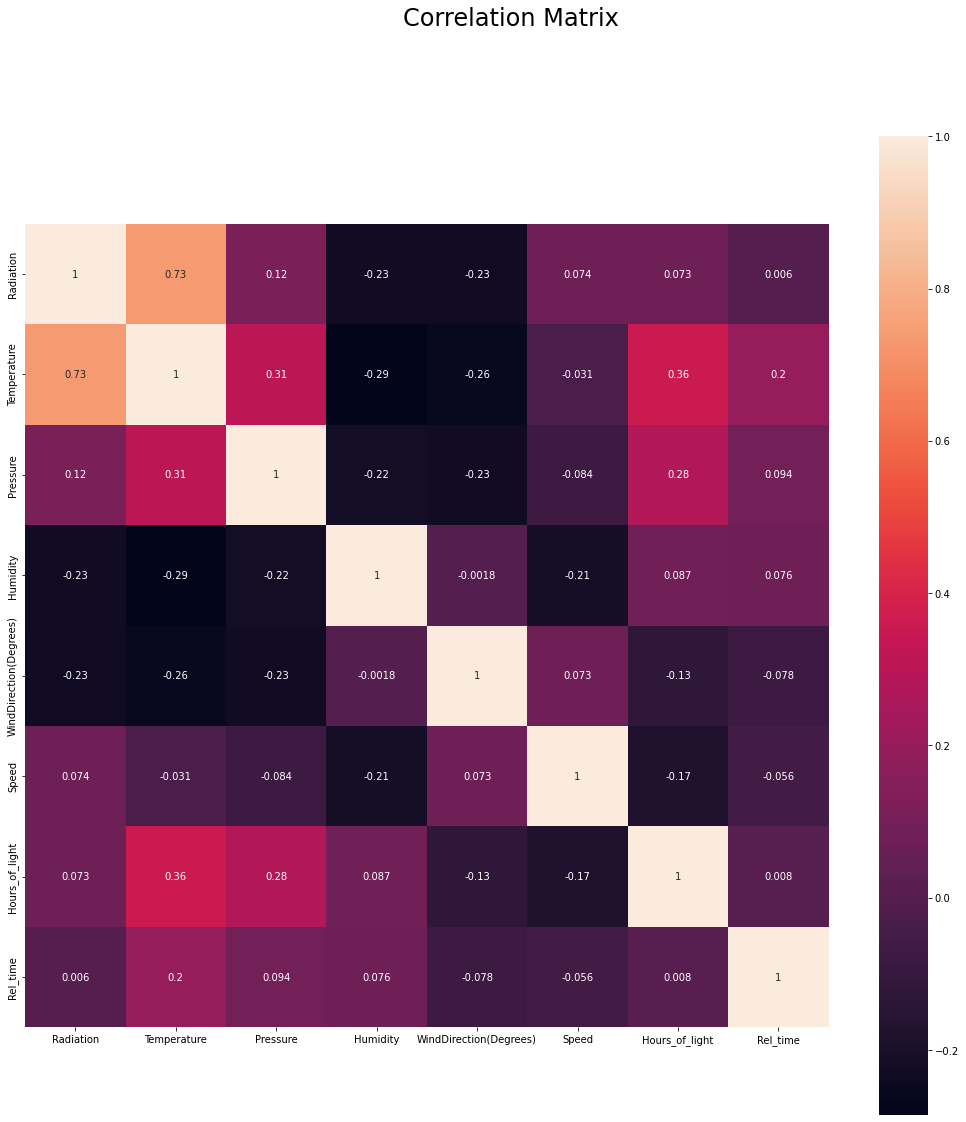

In [124]:
# Plotting a heatmap of the various features in the dfset
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, square=True)
fig.suptitle('Correlation Matrix', fontsize = 24)
plt.show()

According to the correlation matrix, the relationship between the ambient temperature and solar radiation is positive and strongest compared to others

## Modeling

In [125]:
df = data

# Splitting dfset into targets and features
X = df.drop(columns = 'Radiation')
y = df.Radiation

In [126]:
# Splitting df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Scaling df
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Training models
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
          'Support Vector Regression': SVR(kernel='rbf')}

Linear Regression: R^2=0.614, MAE=148.521, RMSE=195.899


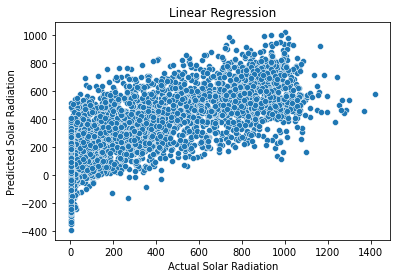

Random Forest: R^2=0.929, MAE=32.274, RMSE=84.213


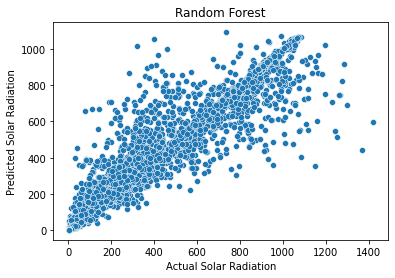

Gradient Boosting: R^2=0.883, MAE=57.354, RMSE=107.920


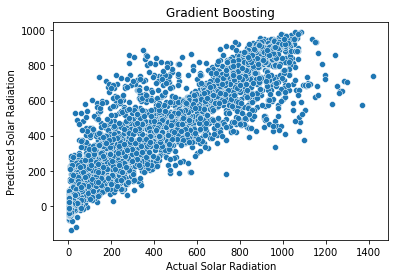

Support Vector Regression: R^2=0.645, MAE=107.428, RMSE=187.770


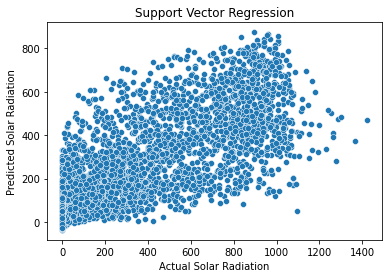

In [129]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluating performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Printing results
    print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")
    
    # Plotting predicted vs. actual values
    plt.figure()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Solar Radiation')
    plt.ylabel('Predicted Solar Radiation')
    plt.title(name)
    plt.show()

In [130]:
# Saving the best model
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)
pickle.dump(best_model, open('solar_radiation_prediction.pkl', 'wb'))
pickle.dump(scaler, open('solar_radiation_prediction.pkl', 'wb'))

In this study, we predict solar radiation.

We then split the df into features and target, and split them into training and testing sets. We also scale the df using the StandardScaler.

Next, we train four different machine learning models: linear regression, random forest regression, gradient boosting regression, and support vector regression. We evaluate the performance of each model using R^2 score, mean absolute error (MAE), and root mean squared error (RMSE), and plot the predicted vs. actual values for each model.

Finally, we select the best performing model (random forest regression in this case) and save it and the scaler using pickle for future deployment.